In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

pd.options.display.max_columns = 100
%matplotlib inline

movies = pd.read_csv('fandango_score_comparison.csv')
movies.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,3.259589,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,0.755356,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,1.200000,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,2.850000,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,3.425000,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,3.750000,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,4.800000,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


In [2]:
import sys
!{sys.executable} -m pip install matplotlib

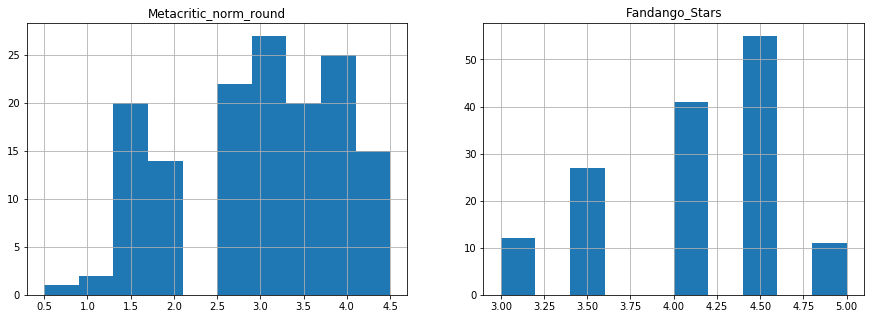

In [21]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_title('Metacritic_norm_round')
ax2.set_title('Fandango_Stars')
movies['Metacritic_norm_round'].hist(ax=ax1)
movies['Fandango_Stars'].hist(ax=ax2)

Fandango's ratings are all 3 or above while Metacritic's go down to 0.5, a much larger range. This could mean fandango is biased towards higher ratings. Fandango's ratings centre around 4.5 while Metacritic's 3.

In [35]:
meta_mean = movies['Metacritic_norm_round'].mean()
fan_mean = movies['Fandango_Stars'].mean()
meta_median = movies['Metacritic_norm_round'].median()
fan_median = movies['Fandango_Stars'].median()
meta_std = movies['Metacritic_norm_round'].std()
fan_std =  movies['Fandango_Stars'].std()

print(meta_mean)
print(fan_mean)
print(meta_median)
print(fan_median)
print(meta_std)
print(fan_std)


2.9726027397260273
4.089041095890411
3.0
4.0
0.9909605613743364
0.5403859779787333


Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.

The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.

Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.

Fandango ratings in general appear to be higher than metacritic ratings.

These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

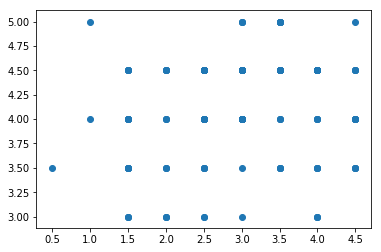

In [40]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [56]:
movies['fm_diff'] = abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])
movies['fm_diff']
movies.sort_values(by=['fm_diff'],ascending=False,inplace=True)
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,1.50,2.95,3.70,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
133,Paul Blart: Mall Cop 2 (2015),5,36,13,2.4,4.3,3.5,3.5,0.25,1.80,0.65,1.20,2.15,0.5,2.0,0.5,1.0,2.0,211,15004,3054,0.0,3.0
35,The Loft (2015),11,40,24,2.4,6.3,4.0,3.6,0.55,2.00,1.20,1.20,3.15,0.5,2.0,1.0,1.0,3.0,80,21319,811,0.4,3.0
15,Taken 3 (2015),9,46,26,4.6,6.1,4.5,4.1,0.45,2.30,1.30,2.30,3.05,0.5,2.5,1.5,2.5,3.0,240,104235,6757,0.4,3.0


In [63]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
r_value

0.17844919073895918

The correlation is only 0.17, quite low. It could mean fandango scores are not just inflated but consistently high while metacritic is varying low to high

In [66]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
slope,intercept

(0.097311077973928364, 3.7997739188994184)

In [71]:
pred1 = 1 * slope + intercept
pred3 = 3 * slope + intercept
pred5 = 5 * slope + intercept

pred1,pred3,pred5

(3.897084996873347, 4.0917071528212032, 4.2863293087690604)

(1, 5)

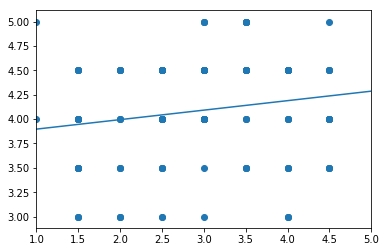

In [75]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
x_values = [1,5]
y_values = [pred1,pred5]
plt.plot(x_values,y_values)
plt.xlim(1,5)